# Data Wrangling Project by Renel Garces

In [106]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import twython
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# setting up authorization for api use has been deleted before submission of this project

consumer_key = #####
consumer_secret = #####
access_token = ####
access_secret = #####

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

### Setting up Directory

In [107]:
# creating folder 'wrangling_project_files'
folder_name = 'wrangling_project_files'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

<Response [200]>

### Setting up dataframes

Three data frames in total.  One was given, one was requested through url, one was constructed by data retrieved through tweepy API.

In [108]:
# the given CSV file
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [109]:
# setting response and testing request
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [110]:
# creating the file and file name and writing the content of the request into it
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [111]:
# setting up second data frame
df2 = pd.read_csv('image-predictions.tsv', sep='\t')

In [112]:
# 2356 tweet ids, extracted from the given CSV file
tweet_ids = list(df['tweet_id'])
tweet_id_errors = {}
df3_list = []

for tweet_id in tweet_ids:
    try:
        # print ranking to gauge processing time
        ranking = tweet_ids.index(tweet_id) + 1
        print(ranking)
        # assigning variable values for df through tweepy api
        tweet = api.get_status(tweet_id)
        retweet_count = tweet.retweet_count
        favorite_count = tweet.favorite_count
        # appending dict with the new values to df3_list
        df3_list.append({'id': int(ranking),
                    'tweet_id': tweet_id,
                    'retweet_count': retweet_count,
                    'favorite_count': favorite_count})
    # excepting errors caused by bad tweet ids
    except Exception as e:
        print(str(ranking) + "_" + str(tweet_id) + ": " + str(e))
        tweet_id_errors[str(ranking) + "_" + str(tweet_id)] = tweet

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
20_888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
96_873697596434513921: [{'code': 144, 'message': 'No status found with that ID.'}]
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
119_869988702071779329: [{'code': 144, 'message': 'No status found with that ID.'}]
120
121
122
123
124
125
126
127
128
129
130
131
132
133
133_866816280283807744: [{'code': 144, 'message': 'No status found with that ID.'}]
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
156_861769973181624320: [{'code': 144, 'message': 'No status found with that ID.'}]
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
17

950_752309394570878976: [{'message': 'Rate limit exceeded', 'code': 88}]
951
951_752173152931807232: [{'message': 'Rate limit exceeded', 'code': 88}]
952
952_751950017322246144: [{'message': 'Rate limit exceeded', 'code': 88}]
953
953_751937170840121344: [{'message': 'Rate limit exceeded', 'code': 88}]
954
954_751830394383790080: [{'message': 'Rate limit exceeded', 'code': 88}]
955
955_751793661361422336: [{'message': 'Rate limit exceeded', 'code': 88}]
956
956_751598357617971201: [{'message': 'Rate limit exceeded', 'code': 88}]
957
957_751583847268179968: [{'message': 'Rate limit exceeded', 'code': 88}]
958
958_751538714308972544: [{'message': 'Rate limit exceeded', 'code': 88}]
959
959_751456908746354688: [{'message': 'Rate limit exceeded', 'code': 88}]
960
960_751251247299190784: [{'message': 'Rate limit exceeded', 'code': 88}]
961
961_751205363882532864: [{'message': 'Rate limit exceeded', 'code': 88}]
962
962_751132876104687617: [{'message': 'Rate limit exceeded', 'code': 88}]
963

1056_742385895052087300: [{'message': 'Rate limit exceeded', 'code': 88}]
1057
1057_742161199639494656: [{'message': 'Rate limit exceeded', 'code': 88}]
1058
1058_742150209887731712: [{'message': 'Rate limit exceeded', 'code': 88}]
1059
1059_741793263812808706: [{'message': 'Rate limit exceeded', 'code': 88}]
1060
1060_741743634094141440: [{'message': 'Rate limit exceeded', 'code': 88}]
1061
1061_741438259667034112: [{'message': 'Rate limit exceeded', 'code': 88}]
1062
1062_741303864243200000: [{'message': 'Rate limit exceeded', 'code': 88}]
1063
1063_741099773336379392: [{'message': 'Rate limit exceeded', 'code': 88}]
1064
1064_741067306818797568: [{'message': 'Rate limit exceeded', 'code': 88}]
1065
1065_740995100998766593: [{'message': 'Rate limit exceeded', 'code': 88}]
1066
1066_740711788199743490: [{'message': 'Rate limit exceeded', 'code': 88}]
1067
1067_740699697422163968: [{'message': 'Rate limit exceeded', 'code': 88}]
1068
1068_740676976021798912: [{'message': 'Rate limit ex

1160_724046343203856385: [{'message': 'Rate limit exceeded', 'code': 88}]
1161
1161_724004602748780546: [{'message': 'Rate limit exceeded', 'code': 88}]
1162
1162_723912936180330496: [{'message': 'Rate limit exceeded', 'code': 88}]
1163
1163_723688335806480385: [{'message': 'Rate limit exceeded', 'code': 88}]
1164
1164_723673163800948736: [{'message': 'Rate limit exceeded', 'code': 88}]
1165
1165_723179728551723008: [{'message': 'Rate limit exceeded', 'code': 88}]
1166
1166_722974582966214656: [{'message': 'Rate limit exceeded', 'code': 88}]
1167
1167_722613351520608256: [{'message': 'Rate limit exceeded', 'code': 88}]
1168
1168_721503162398597120: [{'message': 'Rate limit exceeded', 'code': 88}]
1169
1169_721001180231503872: [{'message': 'Rate limit exceeded', 'code': 88}]
1170
1170_720785406564900865: [{'message': 'Rate limit exceeded', 'code': 88}]
1171
1171_720775346191278080: [{'message': 'Rate limit exceeded', 'code': 88}]
1172
1172_720415127506415616: [{'message': 'Rate limit ex

1264_710117014656950272: [{'message': 'Rate limit exceeded', 'code': 88}]
1265
1265_709918798883774466: [{'message': 'Rate limit exceeded', 'code': 88}]
1266
1266_709901256215666688: [{'message': 'Rate limit exceeded', 'code': 88}]
1267
1267_709852847387627521: [{'message': 'Rate limit exceeded', 'code': 88}]
1268
1268_709566166965075968: [{'message': 'Rate limit exceeded', 'code': 88}]
1269
1269_709556954897764353: [{'message': 'Rate limit exceeded', 'code': 88}]
1270
1270_709519240576036864: [{'message': 'Rate limit exceeded', 'code': 88}]
1271
1271_709449600415961088: [{'message': 'Rate limit exceeded', 'code': 88}]
1272
1272_709409458133323776: [{'message': 'Rate limit exceeded', 'code': 88}]
1273
1273_709225125749587968: [{'message': 'Rate limit exceeded', 'code': 88}]
1274
1274_709207347839836162: [{'message': 'Rate limit exceeded', 'code': 88}]
1275
1275_709198395643068416: [{'message': 'Rate limit exceeded', 'code': 88}]
1276
1276_709179584944730112: [{'message': 'Rate limit ex

1369_702539513671897089: [{'message': 'Rate limit exceeded', 'code': 88}]
1370
1370_702332542343577600: [{'message': 'Rate limit exceeded', 'code': 88}]
1371
1371_702321140488925184: [{'message': 'Rate limit exceeded', 'code': 88}]
1372
1372_702276748847800320: [{'message': 'Rate limit exceeded', 'code': 88}]
1373
1373_702217446468493312: [{'message': 'Rate limit exceeded', 'code': 88}]
1374
1374_701981390485725185: [{'message': 'Rate limit exceeded', 'code': 88}]
1375
1375_701952816642965504: [{'message': 'Rate limit exceeded', 'code': 88}]
1376
1376_701889187134500865: [{'message': 'Rate limit exceeded', 'code': 88}]
1377
1377_701805642395348998: [{'message': 'Rate limit exceeded', 'code': 88}]
1378
1378_701601587219795968: [{'message': 'Rate limit exceeded', 'code': 88}]
1379
1379_701570477911896070: [{'message': 'Rate limit exceeded', 'code': 88}]
1380
1380_701545186879471618: [{'message': 'Rate limit exceeded', 'code': 88}]
1381
1381_701214700881756160: [{'message': 'Rate limit ex

1474_693647888581312512: [{'message': 'Rate limit exceeded', 'code': 88}]
1475
1475_693644216740769793: [{'message': 'Rate limit exceeded', 'code': 88}]
1476
1476_693642232151285760: [{'message': 'Rate limit exceeded', 'code': 88}]
1477
1477_693629975228977152: [{'message': 'Rate limit exceeded', 'code': 88}]
1478
1478_693622659251335168: [{'message': 'Rate limit exceeded', 'code': 88}]
1479
1479_693590843962331137: [{'message': 'Rate limit exceeded', 'code': 88}]
1480
1480_693582294167244802: [{'message': 'Rate limit exceeded', 'code': 88}]
1481
1481_693486665285931008: [{'message': 'Rate limit exceeded', 'code': 88}]
1482
1482_693280720173801472: [{'message': 'Rate limit exceeded', 'code': 88}]
1483
1483_693267061318012928: [{'message': 'Rate limit exceeded', 'code': 88}]
1484
1484_693262851218264065: [{'message': 'Rate limit exceeded', 'code': 88}]
1485
1485_693231807727280129: [{'message': 'Rate limit exceeded', 'code': 88}]
1486
1486_693155686491000832: [{'message': 'Rate limit ex

1579_687317306314240000: [{'message': 'Rate limit exceeded', 'code': 88}]
1580
1580_687312378585812992: [{'message': 'Rate limit exceeded', 'code': 88}]
1581
1581_687127927494963200: [{'message': 'Rate limit exceeded', 'code': 88}]
1582
1582_687124485711986689: [{'message': 'Rate limit exceeded', 'code': 88}]
1583
1583_687109925361856513: [{'message': 'Rate limit exceeded', 'code': 88}]
1584
1584_687102708889812993: [{'message': 'Rate limit exceeded', 'code': 88}]
1585
1585_687096057537363968: [{'message': 'Rate limit exceeded', 'code': 88}]
1586
1586_686947101016735744: [{'message': 'Rate limit exceeded', 'code': 88}]
1587
1587_686760001961103360: [{'message': 'Rate limit exceeded', 'code': 88}]
1588
1588_686749460672679938: [{'message': 'Rate limit exceeded', 'code': 88}]
1589
1589_686730991906516992: [{'message': 'Rate limit exceeded', 'code': 88}]
1590
1590_686683045143953408: [{'message': 'Rate limit exceeded', 'code': 88}]
1591
1591_686618349602762752: [{'message': 'Rate limit ex

1684_681694085539872773: [{'message': 'Rate limit exceeded', 'code': 88}]
1685
1685_681679526984871937: [{'message': 'Rate limit exceeded', 'code': 88}]
1686
1686_681654059175129088: [{'message': 'Rate limit exceeded', 'code': 88}]
1687
1687_681610798867845120: [{'message': 'Rate limit exceeded', 'code': 88}]
1688
1688_681579835668455424: [{'message': 'Rate limit exceeded', 'code': 88}]
1689
1689_681523177663676416: [{'message': 'Rate limit exceeded', 'code': 88}]
1690
1690_681340665377193984: [{'message': 'Rate limit exceeded', 'code': 88}]
1691
1691_681339448655802368: [{'message': 'Rate limit exceeded', 'code': 88}]
1692
1692_681320187870711809: [{'message': 'Rate limit exceeded', 'code': 88}]
1693
1693_681302363064414209: [{'message': 'Rate limit exceeded', 'code': 88}]
1694
1694_681297372102656000: [{'message': 'Rate limit exceeded', 'code': 88}]
1695
1695_681281657291280384: [{'message': 'Rate limit exceeded', 'code': 88}]
1696
1696_681261549936340994: [{'message': 'Rate limit ex

1788_677565715327688705: [{'message': 'Rate limit exceeded', 'code': 88}]
1789
1789_677557565589463040: [{'message': 'Rate limit exceeded', 'code': 88}]
1790
1790_677547928504967168: [{'message': 'Rate limit exceeded', 'code': 88}]
1791
1791_677530072887205888: [{'message': 'Rate limit exceeded', 'code': 88}]
1792
1792_677335745548390400: [{'message': 'Rate limit exceeded', 'code': 88}]
1793
1793_677334615166730240: [{'message': 'Rate limit exceeded', 'code': 88}]
1794
1794_677331501395156992: [{'message': 'Rate limit exceeded', 'code': 88}]
1795
1795_677328882937298944: [{'message': 'Rate limit exceeded', 'code': 88}]
1796
1796_677314812125323265: [{'message': 'Rate limit exceeded', 'code': 88}]
1797
1797_677301033169788928: [{'message': 'Rate limit exceeded', 'code': 88}]
1798
1798_677269281705472000: [{'message': 'Rate limit exceeded', 'code': 88}]
1799
1799_677228873407442944: [{'message': 'Rate limit exceeded', 'code': 88}]
1800
1800_677187300187611136: [{'message': 'Rate limit ex

1892_674764817387900928: [{'message': 'Rate limit exceeded', 'code': 88}]
1893
1893_674754018082705410: [{'message': 'Rate limit exceeded', 'code': 88}]
1894
1894_674752233200820224: [{'message': 'Rate limit exceeded', 'code': 88}]
1895
1895_674743008475090944: [{'message': 'Rate limit exceeded', 'code': 88}]
1896
1896_674742531037511680: [{'message': 'Rate limit exceeded', 'code': 88}]
1897
1897_674739953134403584: [{'message': 'Rate limit exceeded', 'code': 88}]
1898
1898_674737130913071104: [{'message': 'Rate limit exceeded', 'code': 88}]
1899
1899_674690135443775488: [{'message': 'Rate limit exceeded', 'code': 88}]
1900
1900_674670581682434048: [{'message': 'Rate limit exceeded', 'code': 88}]
1901
1901_674664755118911488: [{'message': 'Rate limit exceeded', 'code': 88}]
1902
1902_674646392044941312: [{'message': 'Rate limit exceeded', 'code': 88}]
1903
1903_674644256330530816: [{'message': 'Rate limit exceeded', 'code': 88}]
1904
1904_674638615994089473: [{'message': 'Rate limit ex

1996_672594978741354496: [{'message': 'Rate limit exceeded', 'code': 88}]
1997
1997_672591762242805761: [{'message': 'Rate limit exceeded', 'code': 88}]
1998
1998_672591271085670400: [{'message': 'Rate limit exceeded', 'code': 88}]
1999
1999_672538107540070400: [{'message': 'Rate limit exceeded', 'code': 88}]
2000
2000_672523490734551040: [{'message': 'Rate limit exceeded', 'code': 88}]
2001
2001_672488522314567680: [{'message': 'Rate limit exceeded', 'code': 88}]
2002
2002_672482722825261057: [{'message': 'Rate limit exceeded', 'code': 88}]
2003
2003_672481316919734272: [{'message': 'Rate limit exceeded', 'code': 88}]
2004
2004_672475084225949696: [{'message': 'Rate limit exceeded', 'code': 88}]
2005
2005_672466075045466113: [{'message': 'Rate limit exceeded', 'code': 88}]
2006
2006_672272411274932228: [{'message': 'Rate limit exceeded', 'code': 88}]
2007
2007_672267570918129665: [{'message': 'Rate limit exceeded', 'code': 88}]
2008
2008_672264251789176834: [{'message': 'Rate limit ex

2100_670717338665226240: [{'message': 'Rate limit exceeded', 'code': 88}]
2101
2101_670704688707301377: [{'message': 'Rate limit exceeded', 'code': 88}]
2102
2102_670691627984359425: [{'message': 'Rate limit exceeded', 'code': 88}]
2103
2103_670679630144274432: [{'message': 'Rate limit exceeded', 'code': 88}]
2104
2104_670676092097810432: [{'message': 'Rate limit exceeded', 'code': 88}]
2105
2105_670668383499735048: [{'message': 'Rate limit exceeded', 'code': 88}]
2106
2106_670474236058800128: [{'message': 'Rate limit exceeded', 'code': 88}]
2107
2107_670468609693655041: [{'message': 'Rate limit exceeded', 'code': 88}]
2108
2108_670465786746662913: [{'message': 'Rate limit exceeded', 'code': 88}]
2109
2109_670452855871037440: [{'message': 'Rate limit exceeded', 'code': 88}]
2110
2110_670449342516494336: [{'message': 'Rate limit exceeded', 'code': 88}]
2111
2111_670444955656130560: [{'message': 'Rate limit exceeded', 'code': 88}]
2112
2112_670442337873600512: [{'message': 'Rate limit ex

2205_668636665813057536: [{'message': 'Rate limit exceeded', 'code': 88}]
2206
2206_668633411083464705: [{'message': 'Rate limit exceeded', 'code': 88}]
2207
2207_668631377374486528: [{'message': 'Rate limit exceeded', 'code': 88}]
2208
2208_668627278264475648: [{'message': 'Rate limit exceeded', 'code': 88}]
2209
2209_668625577880875008: [{'message': 'Rate limit exceeded', 'code': 88}]
2210
2210_668623201287675904: [{'message': 'Rate limit exceeded', 'code': 88}]
2211
2211_668620235289837568: [{'message': 'Rate limit exceeded', 'code': 88}]
2212
2212_668614819948453888: [{'message': 'Rate limit exceeded', 'code': 88}]
2213
2213_668587383441514497: [{'message': 'Rate limit exceeded', 'code': 88}]
2214
2214_668567822092664832: [{'message': 'Rate limit exceeded', 'code': 88}]
2215
2215_668544745690562560: [{'message': 'Rate limit exceeded', 'code': 88}]
2216
2216_668542336805281792: [{'message': 'Rate limit exceeded', 'code': 88}]
2217
2217_668537837512433665: [{'message': 'Rate limit ex

2309_666817836334096384: [{'message': 'Rate limit exceeded', 'code': 88}]
2310
2310_666804364988780544: [{'message': 'Rate limit exceeded', 'code': 88}]
2311
2311_666786068205871104: [{'message': 'Rate limit exceeded', 'code': 88}]
2312
2312_666781792255496192: [{'message': 'Rate limit exceeded', 'code': 88}]
2313
2313_666776908487630848: [{'message': 'Rate limit exceeded', 'code': 88}]
2314
2314_666739327293083650: [{'message': 'Rate limit exceeded', 'code': 88}]
2315
2315_666701168228331520: [{'message': 'Rate limit exceeded', 'code': 88}]
2316
2316_666691418707132416: [{'message': 'Rate limit exceeded', 'code': 88}]
2317
2317_666649482315059201: [{'message': 'Rate limit exceeded', 'code': 88}]
2318
2318_666644823164719104: [{'message': 'Rate limit exceeded', 'code': 88}]
2319
2319_666454714377183233: [{'message': 'Rate limit exceeded', 'code': 88}]
2320
2320_666447344410484738: [{'message': 'Rate limit exceeded', 'code': 88}]
2321
2321_666437273139982337: [{'message': 'Rate limit ex

In [379]:
# creating a DataFrame from df3_list
df3 = pd.DataFrame(df3_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df3 = df3.sort_values('retweet_count').reset_index(drop=True)

### Assessing the data

In [380]:
df1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1377,701601587219795968,NaN,NaN,2016-02-22 02:57:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coopson. He's a Blingin Schnitzel. Bui...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701601587...,10,10,Coopson,NaN,NaN,NaN,NaN
121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,NaN,NaN,NaN
265,842115215311396866,NaN,NaN,2017-03-15 20:48:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. It's his first time going to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842115215...,12,10,Bentley,NaN,NaN,NaN,NaN
1252,710844581445812225,NaN,NaN,2016-03-18 15:05:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Staniel. His selfie game is strong af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710844581...,10,10,Staniel,NaN,NaN,NaN,NaN
1463,694669722378485760,NaN,NaN,2016-02-02 23:52:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. He's an important dog. Can contr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,NaN,NaN,NaN,NaN


In [381]:
df2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
717,685663452032069632,https://pbs.twimg.com/ext_tw_video_thumb/68566...,1,Chesapeake_Bay_retriever,0.171174,True,tennis_ball,0.090644,False,racket,0.048508,False
528,676776431406465024,https://pbs.twimg.com/ext_tw_video_thumb/67677...,1,doormat,0.201346,False,dishwasher,0.191749,False,microwave,0.038110,False
660,682406705142087680,https://pbs.twimg.com/media/CXhlRmRUMAIYoFO.jpg,1,wombat,0.709344,False,koala,0.169758,False,beaver,0.079433,False
715,685547936038666240,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,1,web_site,0.923987,False,oscilloscope,0.009712,False,hand-held_computer,0.008769,False
1182,738402415918125056,https://pbs.twimg.com/media/Cj9VEs_XAAAlTai.jpg,1,cocker_spaniel,0.346695,True,Blenheim_spaniel,0.193905,True,Chihuahua,0.078000,True


In [969]:
df3.head(5)

,tweet_id,retweet_count,favorite_count
0,838085839343206401,0,149
1,840698636975636481,2,192
2,832088576586297345,2,71
3,870726314365509632,3,120
4,886267009285017600,4,116


In [970]:
df1.shape, df2.shape, df3.shape

((2356, 17), (2075, 12), (888, 3))

In [971]:
df1.info(), df2.info(), df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(4), int64(3), object(10

(None, None, None)

In [972]:
# checking the denominator values for df1
df1.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

In [973]:
# checking for duplicate entries for the same image in the df2
df2.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

### Quality Issues

1.  df1 has string 'None' for 'Name' column instead of NaN values
2.  df1 has different denominator counts than '10'
3.  df1 has useless data; in_reply_to_status_id' and 'in_reply_to_user_id', since vast majority is NaN
4.  df2 has duplicate entries for the same images
5.  df1 has source column values difficult to read
6.  df2 has lower cased and capitalized breed names
7.  df1 has non dog ratings indicated by the 'expanded_urls' without 'dog_rates' in the values
8.  df1, df2, and df3 have unequal amount of entries

### Tidiness Issues

1.  df1, doggo, floofer, pupper, puppo should be 1 column with 4 categorical values instead of 4 seperate columns
2.  df3 should be part of the df1, twitter archive df

### Clean

In [1241]:
# set up clean copies for testing
df1_clean = df1
df2_clean = df2
df3_clean = df3

### Define
Replace 'None' values with np.NaN in df1

### Code

In [1242]:
df1_clean.replace('None', np.NaN, inplace=True)

### Test

In [1243]:
df1_clean[df1_clean.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define
Set all values in df1's 'rating_denominator' column to 10

### Code

In [1244]:
df1_clean.rating_denominator = 10

### Test

In [1245]:
df1_clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

### Define
Remove uncessary in_reply columns

### Code

In [1246]:
df1_clean = df1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

### Test

In [1247]:
df1_clean.sample(1)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1768,678389028614488064,2015-12-20 01:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She just learned that her final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678389028...,11,10,Bella,NaN,NaN,pupper,NaN


### Define
Remove duplicate entries by jpg_url in df2

### Code

In [1248]:
df2_clean = df2_clean[~(df2_clean.jpg_url.duplicated())]

### Test

In [1249]:
df2_clean.jpg_url.duplicated().value_counts()

False    2009
Name: jpg_url, dtype: int64

### Define
Convert source values to iphone or tweetdeck

### Code

In [1250]:
# identify different sources
source_list = df1_clean.source.unique()
source_list

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [1251]:
source_cats = [len(x) for x in source_list]
source_cats

[82, 66, 63, 83]

In [1252]:
# function to apply to source column that converts values
def source_val_converter(tweet):
    if len(tweet['source']) == 82:
        return 'Iphone'
    elif len(tweet['source']) == 66:
        return 'Twitter web'
    elif len(tweet['source']) == 63:
        return 'Vine'
    elif len(tweet['source']) == 83:
        return 'Tweetdeck'
    
df1_clean['source'] = df1_clean.apply(source_val_converter, axis=1)

In [1253]:
df1_clean.source.value_counts()

Iphone         2221
Vine             91
Twitter web      33
Tweetdeck        11
Name: source, dtype: int64

### Test

In [1254]:
df1_clean.source.unique()

array(['Iphone', 'Twitter web', 'Vine', 'Tweetdeck'], dtype=object)

### Define
Capitalize the values in the p1, p2, and p3 columns in df2

### Code

In [1255]:
df2_clean['p1'] = df2_clean['p1'].str.title()
df2_clean['p2'] = df2_clean['p2'].str.title()
df2_clean['p3'] = df2_clean['p3'].str.title()

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

### Test

In [1256]:
list1 = list(df2_clean.p1.unique())
list2 = list(df2_clean.p2.unique())
list3 = list(df2_clean.p3.unique())

full_list = list1 + list2 + list3

any(word[0].islower() for word in full_list)

False

### Define
Remove rows with non-'dog_rate'-containing values from expanded urls in df1

### Code

In [1257]:
df1_clean.head(1)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN


In [1258]:
val = 'dog_rates'
# make temporary column
df1_clean['test'] = df1_clean['expanded_urls'].str.split('/')
# convert new column in a list
test_list = list(df1_clean['test'])
# create a list of values that will indicate valid rows
new_col_list = []
for value in test_list:
    if type(value) == list:
        new_col_list.append(value[3])
    else:
        new_col_list.append('not_list')
        
# This created a list where value would equal 'dog_rates' if expanded urls contained 'dog_rates', other-
# wise contain a value that indicates a non dog site

df1_clean['test'] = new_col_list
df1_clean = df1_clean.query('test == "dog_rates"')

### Test

In [1259]:
df1_clean['test'].value_counts()

dog_rates    2099
Name: test, dtype: int64

In [1260]:
### Now dropping test column
df1_clean.drop('test', axis=1, inplace=True)

### Define
Melt the doggo, floofer, pupper, and puppo columns into a new column called type

Also get rid of unecessary columns

### Code

In [1261]:
# dropping some unecessray columns
df1_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace=True)

In [1262]:
# eliminate dogs that are neither doggos, floofers, puppers, or puppos
df1_clean = df1_clean[~(df1_clean.doggo.isnull() & df1_clean.floofer.isnull() & df1_clean.pupper.isnull() &
          df1_clean.puppo.isnull())]

In [1263]:
# creating type column and dropping the columns that should be values 
puppos = df1_clean[df1_clean.puppo == 'puppo']
puppos.loc[:, 'type'] = 'puppo'
puppos.drop(['puppo', 'pupper', 'doggo', 'floofer'], axis=1, inplace=True)

puppers = df1_clean[df1_clean.pupper == 'pupper']
puppers.loc[:, 'type'] = 'pupper'
puppers.drop(['puppo', 'pupper', 'doggo', 'floofer'], axis=1, inplace=True)

doggos = df1_clean[df1_clean.doggo == 'doggo']
doggos.loc[:, 'type'] = 'doggo'
doggos.drop(['puppo', 'pupper', 'doggo', 'floofer'], axis=1, inplace=True)

floofers = df1_clean[df1_clean.floofer == 'floofer']
floofers.loc[:, 'type'] = 'floofer'
floofers.drop(['puppo', 'pupper', 'doggo', 'floofer'], axis=1, inplace=True)

df1_clean = pd.concat([puppos, puppers, doggos, floofers])




/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [1264]:
df1_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type
12,889665388333682689,2017-07-25 01:55:32 +0000,Iphone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,NaN,puppo
14,889531135344209921,2017-07-24 17:02:04 +0000,Iphone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo
71,878776093423087618,2017-06-25 00:45:22 +0000,Iphone,This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,puppo
94,874012996292530176,2017-06-11 21:18:31 +0000,Iphone,This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,puppo
129,867421006826221569,2017-05-24 16:44:18 +0000,Iphone,This is Shikha. She just watched you drop a sk...,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,puppo
168,859607811541651456,2017-05-03 03:17:27 +0000,Iphone,Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13,10,NaN,puppo
191,855851453814013952,2017-04-22 18:31:02 +0000,Iphone,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,puppo
395,825535076884762624,2017-01-29 02:44:34 +0000,Iphone,Here's a very loving and accepting puppo. Appe...,https://twitter.com/dog_rates/status/825535076...,14,10,NaN,puppo
413,822872901745569793,2017-01-21 18:26:02 +0000,Iphone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,NaN,puppo
469,816829038950027264,2017-01-05 02:09:53 +0000,Iphone,RT @dog_rates: This is Betty. She's assisting ...,https://twitter.com/dog_rates/status/790946055...,12,10,Betty,puppo


### Test

In [1265]:
puppos = df1_clean[df1_clean.type == 'puppo'].count()[0]
puppers = df1_clean[df1_clean.type == 'pupper'].count()[0]
doggos = df1_clean[df1_clean.type == 'doggo'].count()[0]
floofers = df1_clean[df1_clean.type== 'floofer'].count()[0]
puppos, puppers, doggos, floofers

(23, 227, 81, 8)

In [1266]:
df1_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type
1531,690015576308211712,2016-01-21 03:38:27 +0000,Iphone,This pupper can only sleep on shoes. It's a cr...,https://twitter.com/dog_rates/status/690015576...,12,10,NaN,pupper
1584,687096057537363968,2016-01-13 02:17:20 +0000,Iphone,This pupper's New Year's resolution was to bec...,https://twitter.com/dog_rates/status/687096057...,11,10,NaN,pupper
478,815966073409433600,2017-01-02 17:00:46 +0000,Iphone,Here's a pupper with squeaky hiccups. Please e...,https://twitter.com/dog_rates/status/815966073...,13,10,NaN,pupper
293,837820167694528512,2017-03-04 00:21:08 +0000,Iphone,"Here's a pupper before and after being asked ""...",https://twitter.com/dog_rates/status/837820167...,12,10,NaN,pupper
914,757393109802180609,2016-07-25 01:52:43 +0000,Iphone,Here's a doggo completely oblivious to the dou...,https://twitter.com/dog_rates/status/757393109...,10,10,NaN,doggo


### Define
Join df3 and df1 together on tweet_id

### Code

In [1267]:
full_clean_df = pd.merge(df1_clean, df3, on='tweet_id')

### Test

In [1268]:
full_clean_df.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,retweet_count,favorite_count
62,785639753186217984,2016-10-11 00:34:48 +0000,Iphone,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,pupper,2478,8498


### Storing CSV

In [1269]:
full_clean_df.to_csv('twitter_archive_master.csv', index=False)

In [1270]:
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(df3_list, outfile)

### EDA

### Most Common Dog Type

Text(0.5,1,'Which Dog Type is the Most Common')

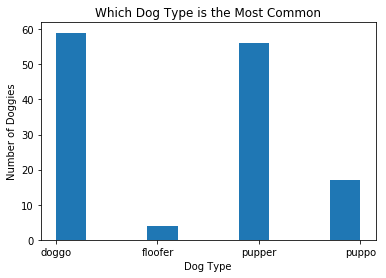

In [1271]:
plt.hist(full_clean_df['type'])
plt.ylabel('Number of Doggies')
plt.xlabel('Dog Type')
plt.title('Which Dog Type is the Most Common')

### Most Famous Doggie via Retweets

In [1272]:
sum_df = full_clean_df.groupby('type').sum()['retweet_count']
count_df = full_clean_df.groupby('type').count()['tweet_id']
retweet_per_doggy = sum_df/count_df

Text(0.5,1,'Average Retweets for Dog Type')

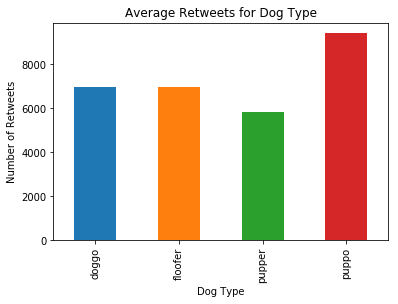

In [1273]:
retweet_per_doggy.plot(kind='bar')
plt.ylabel('Number of Retweets')
plt.xlabel('Dog Type')
plt.title('Average Retweets for Dog Type')

### Who's a Good Boy?

In [1274]:
full_clean_df.groupby('type')['rating_numerator'].mean()

type
doggo      12.101695
floofer    12.250000
pupper     12.107143
puppo      12.705882
Name: rating_numerator, dtype: float64

Text(0.5,1,"Who's the Goodest Boy?")

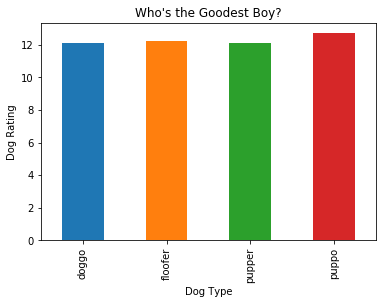

In [1275]:
full_clean_df.groupby('type')['rating_numerator'].mean().plot(kind='bar')
plt.ylabel('Dog Rating')
plt.xlabel('Dog Type')
plt.title("Who's the Goodest Boy?")